In [ ]:
import pandas as pd
seeds_df = pd.read_csv('/content/drive/MyDrive/seeds_dataset.txt',delimiter='\t', header = None)
seeds_df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Shuffle the dataset before splitting into training and testing datasets ###

In [ ]:
## Shuffle the dataset with their corresponding labels##
df_shuffle = seeds_df.sample(frac=1, random_state = 1)
# frac indicates the % of the returned samples, 1 means that all the items are returned after being sampled in a random order (i.e., shuffled)
# random_state is set to ensure reproducibilty
print(df_shuffle.head())

         0      1       2      3      4      5      6  7
44   15.11  14.54  0.8986  5.579  3.462  3.128  5.180  1
188  11.23  12.82  0.8594  5.089  2.821  7.524  4.957  3
51   15.78  14.91  0.8923  5.674  3.434  5.593  5.136  1
204  12.37  13.47  0.8567  5.204  2.960  3.919  5.001  3
35   16.12  15.00  0.9000  5.709  3.485  2.270  5.443  1


### Splitting the dataset into 80% training and 20% testing ###

In [ ]:
## Split the dataset 80% training & 20% testing ##
from sklearn.model_selection import train_test_split
# train_test_split spplits data into random train and test subsets
train, test = train_test_split(df_shuffle, test_size = 0.2, random_state = 3)
# random state is set to ensure reproducibility
print(train.head())
print(test.head())

         0      1       2      3      4      5      6  7
87   18.98  16.66  0.8590  6.549  3.670  3.691  6.498  2
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3
161  12.02  13.33  0.8503  5.350  2.810  4.271  5.308  3
43   15.50  14.86  0.8820  5.877  3.396  4.711  5.528  1
155  11.19  13.05  0.8253  5.250  2.675  5.813  5.219  3
         0      1       2      3      4      5      6  7
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
93   18.59  16.05  0.9066  6.037  3.860  6.001  5.877  2
159  11.49  13.22  0.8263  5.304  2.695  5.388  5.310  3
131  18.94  16.32  0.8942  6.144  3.825  2.908  5.949  2
77   20.71  17.23  0.8763  6.579  3.814  4.451  6.451  2


### Working on the first and fifth attributes only of the dataset with X_train & X_test ###

In [ ]:
X_train = train[[0,4]]
X_test = test[[0,4]]
print(X_train.head())
print(X_train.shape)
print(X_test.head())
print(X_test.shape)

         0      4
87   18.98  3.670
209  12.30  2.974
161  12.02  2.810
43   15.50  3.396
155  11.19  2.675
(168, 2)
         0      4
3    13.84  3.379
93   18.59  3.860
159  11.49  2.695
131  18.94  3.825
77   20.71  3.814
(42, 2)


### Extracting the labels of the training and testing datasets into y_train & y_test###

In [ ]:
y_train = train[[7]]
y_test = test[[7]]
print(y_train.head())
print(y_test.head())
print(y_train.shape)
print(y_test.shape)

     7
87   2
209  3
161  3
43   1
155  3
     7
3    1
93   2
159  3
131  2
77   2
(168, 1)
(42, 1)


In [ ]:
## Binarizing the lables ##
def Bin1(y):
  # y DataFrame
  # Returns yBin1 DataFrame with labels 1 for class 1 and -1 for classes 2 and 3
  yBin1 = y.replace([1,2,3],[1,-1,-1])
  return yBin1

### Standardizing the training data before training, Since it is nonlinear, therefore we used MLP classifier ###

In [ ]:
yBin1_train = Bin1(y_train)
yBin1_test = Bin1(y_test)
#print(yBin1_train.head())

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
clf_per1_std = MLPClassifier(solver='lbfgs', alpha=0.2,
                     hidden_layer_sizes=(5,), random_state=1, verbose = 1)
#clf_per1_std = make_pipeline(StandardScaler(),  Perceptron(verbose = 1))
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Convert y to a row vector
yBin1_train = yBin1_train.values.ravel()
yBin1_test = yBin1_test.values.ravel()
clf_per1_std.fit(X_train_std, yBin1_train)
print(clf_per1_std.score(X_test_std, yBin1_test))
## Predict proba provides probability of belonging to each class for the samples ###
confidence_Bin1 = clf_per1_std.predict_proba(X_test_std)
confidence_bin1_pre = clf_per1_std.predict(X_test_std)
## Second column is the probability that the sample belongs to the first (positive) class while the first column is the probability
## that the sample belongs to the second (neagtive) class
#print(confidence_Bin1)
prob_first_class = confidence_Bin1[:,1]
#print(prob_first_class)

0.8571428571428571


### Estimating the labels of the testing datasets by X_test by probability ###

### The attributes of the fisrt Perceptron ###

In [ ]:
print('The number of training iterations is ', clf_per1_std.n_iter_)

The number of training iterations is  60


### Plotting the decision boundary of the first perceptron classifier ###

---



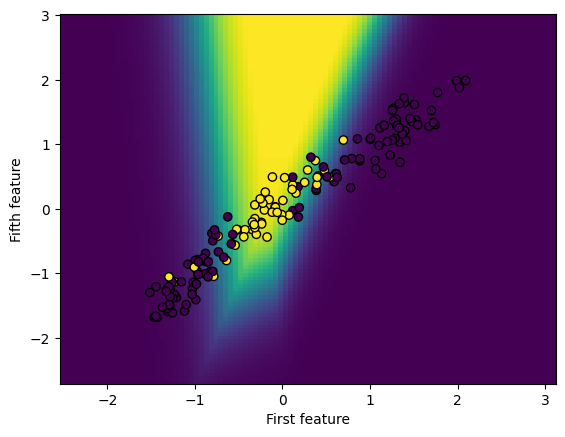

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(clf_per1_std, X_train_std, response_method = 'predict_proba',
                                              xlabel = 'First feature', ylabel = 'Fifth feature', plot_method = 'pcolormesh')
disp.ax_.scatter(X_train_std[:,0], X_train_std[:,1], c=yBin1_train, edgecolor = 'k')
plt.show()

### Plotting the Confusion Matrix of the yBin1 Per ###

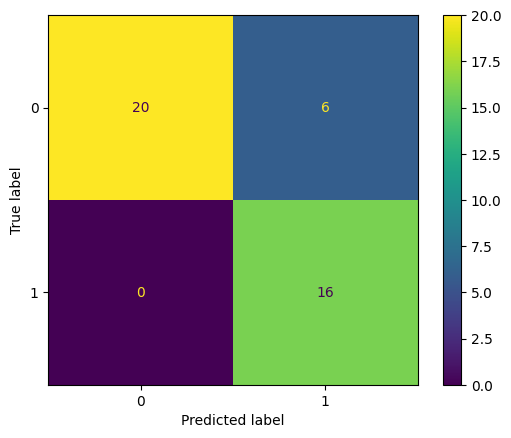

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions1 = clf_per1_std.predict(X_test_std)
#print(predictions1)
cm = confusion_matrix(predictions1,yBin1_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Perceptron classifier for yBin2 ###

In [ ]:
## Binarizing the lables ##
def Bin2(y):
  # y DataFrame are the labels
  # Returns yBin2 DataFrame with labels 1 for class 2 and -1 for classes 1 and 3
  yBin2 = y.replace([1,3,2], [-1,-1,1])
  return yBin2

In [ ]:
yBin2_train = Bin2(y_train)
yBin2_test = Bin2(y_test)
#print(yBin2_train.head())
#print(yBin2_test.head())
## Convert y to a row vector
yBin2_train = yBin2_train.values.ravel()
yBin2_test = yBin2_test.values.ravel()

clf_per2 = MLPClassifier(solver='lbfgs', alpha=0.2,
                     hidden_layer_sizes=(5,), random_state=1, verbose = 1)
clf_per2.fit(X_train, yBin2_train)
print('Score for the second perceptron model is ' ,clf_per2.score(X_test, yBin2_test))
confidence_Bin2 = abs(clf_per2.predict_proba(X_test))
## confidence score of the samples is the signed distance between each sample and the hyperplane ##
#print('The confidence array for the second perceptron model is ', confidence_Bin2)
#print(clf_per2.predict(X_test))

Score for the second perceptron model is  0.9761904761904762


In [ ]:
#print('The confidence array for the second perceptron model is ', confidence_Bin2)
#print(clf_per2.predict(X_test))
## Second row is positive class
prob_second_class = confidence_Bin2[:,1]
#print(prob_second_class)

### Plotting the confusion matrix for yBin2 ###

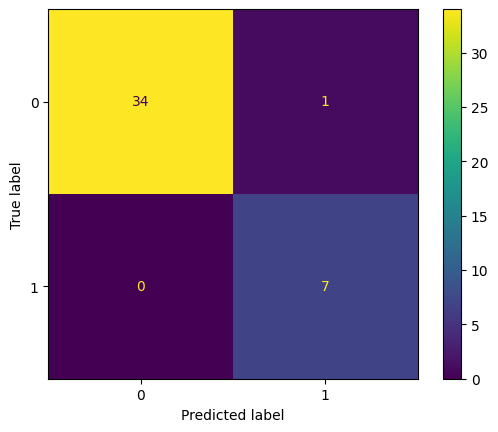

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions2 = clf_per2.predict(X_test)
#print(predictions2)
cm = confusion_matrix(yBin2_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plot the decision boundary of the second perceptron classifier ###

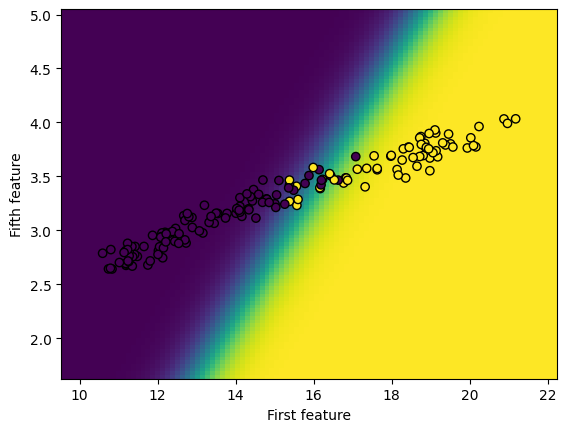

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(clf_per2, X_train, response_method = 'predict_proba',
                                              xlabel = 'First feature', ylabel = 'Fifth feature', plot_method = 'pcolormesh')
disp.ax_.scatter(X_train[[0]], X_train[[4]], c=yBin2_train, edgecolor = 'k')
plt.show()

### Perceptron classifier for yBin3 ###

In [ ]:
## Binarizing the lables ##
def Bin3(y):
  # y DataFrame are the labels
  # Returns yBin3 DataFrame with labels 1 for class 3 and -1 for classes 1 and 2
  yBin3 = y.replace([1,2,3], [-1,-1,1])
  return yBin3

In [ ]:
yBin3_train = Bin3(y_train)
yBin3_test = Bin3(y_test)
#print(yBin3_train.head())
#print(yBin3_test.head())

clf_per3 = MLPClassifier( activation = 'tanh', random_state = 1, verbose = 1)
## Convert y to a row vector
yBin3_train = yBin3_train.values.ravel()
yBin3_test = yBin3_test.values.ravel()
clf_per3.fit(X_train, yBin3_train)
print('The score for the third perceptron model on the testing dataset is ',clf_per3.score(X_test, yBin3_test))
confidence_Bin3 = clf_per3.predict_proba(X_test)
#print('The confidence score of the third perceptron classifier is ', confidence_Bin3)
#print(clf_per3.predict(X_test))
prob_third_class = confidence_Bin3[:,1]

Iteration 1, loss = 1.89941762
Iteration 2, loss = 1.81767860
Iteration 3, loss = 1.73710643
Iteration 4, loss = 1.65789108
Iteration 5, loss = 1.58023679
Iteration 6, loss = 1.50436059
Iteration 7, loss = 1.43049087
Iteration 8, loss = 1.35886760
Iteration 9, loss = 1.28974314
Iteration 10, loss = 1.22338017
Iteration 11, loss = 1.16004635
Iteration 12, loss = 1.10000712
Iteration 13, loss = 1.04351731
Iteration 14, loss = 0.99081160
Iteration 15, loss = 0.94209384
Iteration 16, loss = 0.89752611
Iteration 17, loss = 0.85721814
Iteration 18, loss = 0.82121811
Iteration 19, loss = 0.78950595
Iteration 20, loss = 0.76198987
Iteration 21, loss = 0.73850702
Iteration 22, loss = 0.71882825
Iteration 23, loss = 0.70266682
Iteration 24, loss = 0.68969035
Iteration 25, loss = 0.67953467
Iteration 26, loss = 0.67181869
Iteration 27, loss = 0.66615874
Iteration 28, loss = 0.66218161
Iteration 29, loss = 0.65953543
Iteration 30, loss = 0.65789792
Iteration 31, loss = 0.65698203
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Plotting the confusion matrix for yBin3 Per###

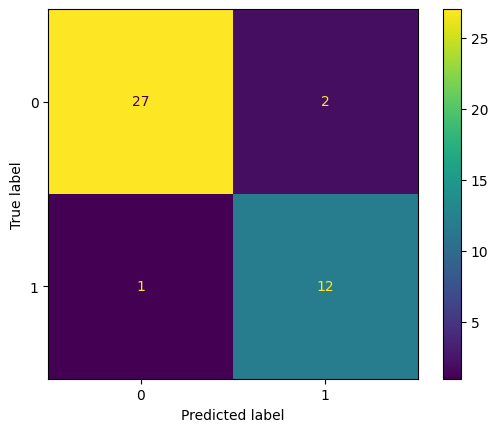

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions3 = clf_per3.predict(X_test)
#print(predictions3)
cm = confusion_matrix(yBin3_test, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plotting the confusion matrix of the third perceptron classifier ###

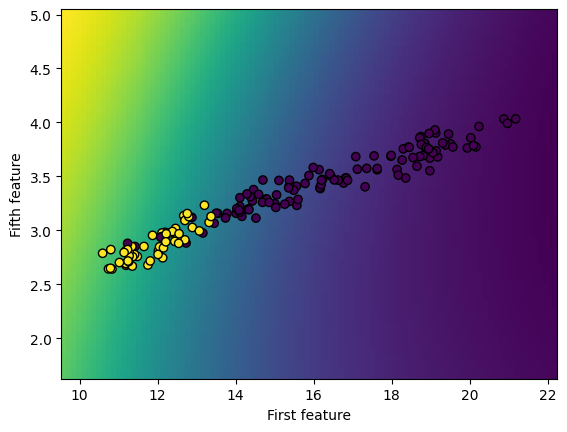

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(clf_per3, X_train, response_method = 'predict_proba',
                                              xlabel = 'First feature', ylabel = 'Fifth feature', plot_method = 'pcolormesh')
disp.ax_.scatter(X_train[[0]], X_train[[4]], c=yBin3_train, edgecolor = 'k')
plt.show()

### Argmax of the confidence scores of the three perceptron classifiers ###

### Argmax of the absolute values of confidences ###


In [ ]:
import numpy as np
confidence_all = np.stack((prob_first_class, prob_second_class, prob_third_class))
inferences_per = np.argmax (confidence_all , axis =0) + 1
#inferences_abs = np.argmax(confidence_all_abs , axis =0) + 1
#print(inferences_abs)
#print(inferences_abs.shape)

### Compare inferences_abs_cmp with y_test ###

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(inferences_per, y_test)

0.8571428571428571

### Plotting the confusion matrix of OvR-Per ###

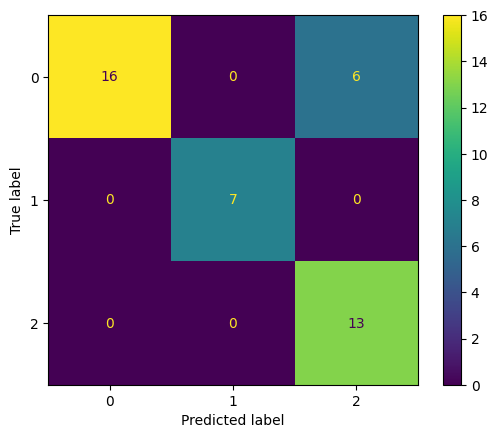

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#print(predictions_svm1)
cm = confusion_matrix(y_test, inferences_per)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plotting the correct and wrong prediction points of OvR Perceptron ###

In [ ]:
print(y_test.shape)
print(inferences_per.shape)
y_test_ravel = y_test.values.ravel()
print(y_test_ravel.shape)
arr_equ = y_test_ravel == inferences_per
print(arr_equ)
true_indices_per = np.where(arr_equ == True)
print(true_indices_per)
false_indices_per = np.where(arr_equ == False)
print(false_indices_per)

(42, 1)
(42,)
(42,)
[ True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True]
(array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
       20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39,
       40, 41]),)
(array([ 6,  7, 17, 26, 34, 36]),)


In [ ]:
#print(X_train)
#print(X_train.index)
X_train_numpy = X_train.to_numpy()
#print(X_train_numpy)
correct_per = X_train_numpy[true_indices_per]
wrong_per = X_train_numpy[false_indices_per]

Text(0.5, 1.0, 'Plot of correct detection points of OvR Perceptron')

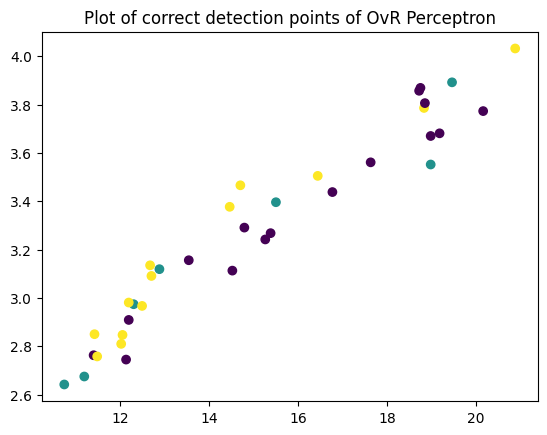

In [ ]:

plt.scatter(correct_per[:,0], correct_per[:,1], c=y_test_ravel[[true_indices_per]])

plt.title('Plot of correct detection points of OvR Perceptron')

Text(0.5, 1.0, 'Plot of wrong detection points of OvR Perceptron')

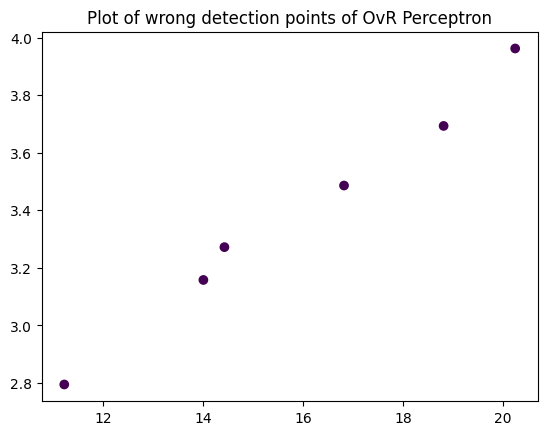

In [ ]:
plt.scatter(wrong_per[:,0], wrong_per[:,1], c = y_test_ravel[[false_indices_per]])
plt.title('Plot of wrong detection points of OvR Perceptron')

## SVM OVR ##

In [ ]:
## SVM Classifier ##
from sklearn.svm import SVC
clf_svm1 = SVC( probability = True, gamma = 'auto')
yBin1_train = Bin1(y_train)
yBin1_train = yBin1_train.values.ravel()
yBin1_test = Bin1(y_test)
yBin1_test = yBin1_test.values.ravel()
clf_svm1.fit(X_train_std, yBin1_train)
score_svm1 = clf_svm1.score(X_test_std, yBin1_test)
print('The accuracy of the SVM for yBin1 is ', score_svm1)
print(clf_svm1.get_params(deep = True))
confidence_svm1 = clf_svm1.predict_proba(X_test_std)
#print(confidence_svm1)
predict_svm_1 = clf_svm1.predict(X_test_std)
#print(predict_svm_1)
prob_first_class_svm =confidence_svm1[:,1]

The accuracy of the SVM for yBin1 is  0.8333333333333334
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Plotting the confusion matrix for yBin1 SVM ###

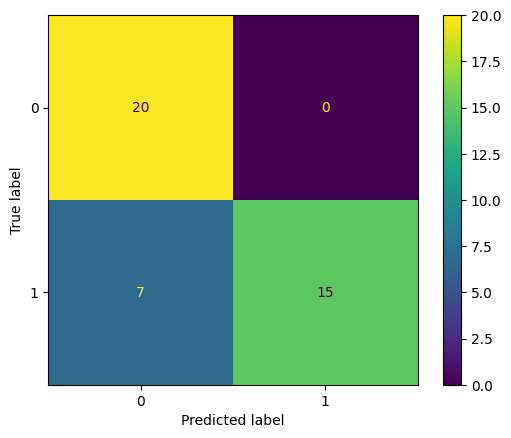

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions_svm1 = clf_svm1.predict(X_test_std)
#print(predictions_svm1)
cm = confusion_matrix(yBin1_test, predictions_svm1)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plotting the Decision Boundary for the first SVM classifier using predict function ###

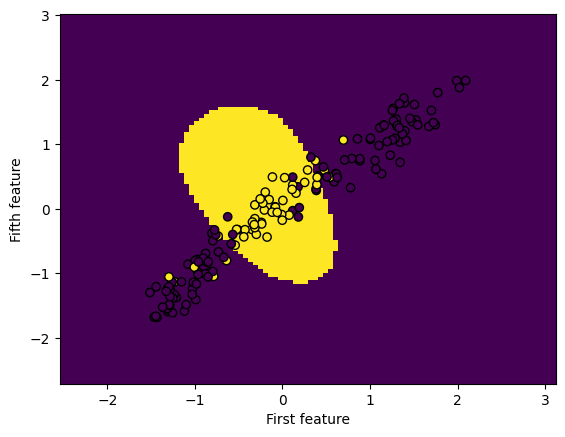

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(clf_svm1, X_train_std, response_method = 'predict',
                                              xlabel = 'First feature', ylabel = 'Fifth feature', plot_method = 'pcolormesh')
disp.ax_.scatter(X_train_std[:,0], X_train_std[:,1], c=yBin1_train, edgecolor = 'k')
plt.show()

### SVM for yBin2 ###

In [ ]:
## SVM Classifier ##
from sklearn.svm import SVC
clf_svm2 = SVC(probability = True)
clf_svm2.fit(X_train, yBin2_train)
score_svm2 = clf_svm2.score(X_test, yBin2_test)
print('The accuracy of the SVM for yBin2 is ', score_svm2)
confidence_svm2 = clf_svm2.predict_proba(X_test)
prob_2nd_class_svm = confidence_svm2[:,1]

The accuracy of the SVM for yBin2 is  1.0


### Plotting the confusion matrix for yBin2 SVM###

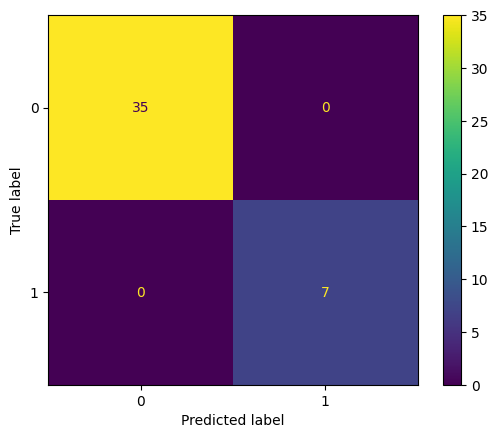

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions_svm2 = clf_svm2.predict(X_test)
#print(predictions_svm1)
cm = confusion_matrix(yBin2_test, predictions_svm2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plotting the decsion boundary for the second svm classifier ###

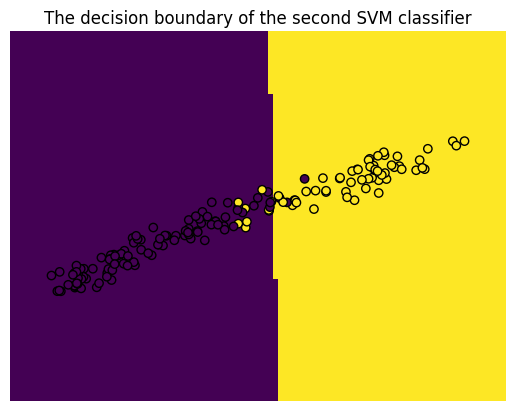

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(clf_svm2, X_train, response_method = 'predict',
                                              xlabel = 'First feature', ylabel = 'Fifth feature', plot_method = 'pcolormesh')
disp.ax_.scatter(X_train[[0]], X_train[[4]], c=yBin2_train, edgecolor = 'k')
plt.title('The decision boundary of the second SVM classifier')
plt.axis('off')
plt.show()



### Plotting the decision boundary of the second SVM classifier with response_method = predict ###

### The third SVM classifier ###

In [ ]:
## SVM Classifier ##
from sklearn.svm import SVC
clf_svm3 = SVC(kernel ='poly',probability = True,degree = 3)
clf_svm3.fit(X_train_std, yBin3_train)
score_svm3 = clf_svm3.score(X_test_std, yBin3_test)
print('The accuracy of the SVM for yBin3 is ', score_svm3)
confidence_svm3 = clf_svm3.predict_proba(X_test_std)
prob_3rd_class_svm = confidence_svm3[:,1]

The accuracy of the SVM for yBin3 is  0.9047619047619048


### Plotting the confusion matrix for yBin3 ###

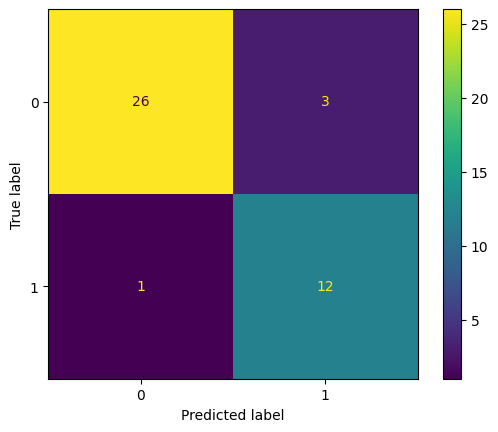

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions_svm3 = clf_svm3.predict(X_test_std)
#print(predictions_svm1)
cm = confusion_matrix(yBin3_test, predictions_svm3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plotting the decision boundary of the third SVM classifier ###

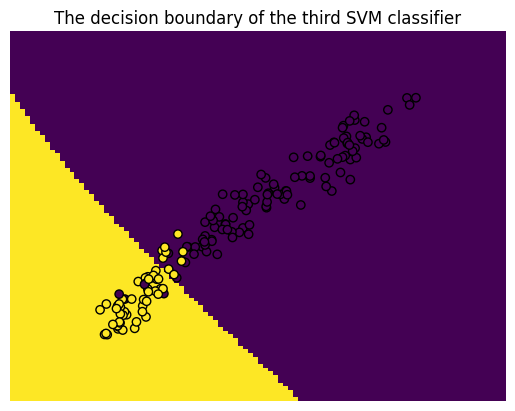

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(clf_svm3, X_train_std, response_method = 'predict',
                                              xlabel = 'First feature', ylabel = 'Fifth feature', plot_method = 'pcolormesh')
disp.ax_.scatter(X_train_std[:,0], X_train_std[:,1], c=yBin3_train, edgecolor = 'k')
plt.title('The decision boundary of the third SVM classifier')
plt.axis('off')
plt.show()

## Consolidating OVR for all classifiers to get a multiclass classifier ##

### The confidence score for each classifier ###

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

confidence_all_svm = np.stack((prob_first_class_svm, prob_2nd_class_svm, prob_3rd_class_svm))
#print(confidence_all_svm)
## Assign each test sample to the closest class with minimum distance between the hyperplane
inferences_all_svm = np.argmax(confidence_all_svm , axis =0) + 1
#print(inferences_all_svm)
#print(y_test)

score_svm_ovr = accuracy_score(inferences_all_svm, y_test)
print('The accuracy of OVR SVM is ', score_svm_ovr)

The accuracy of OVR SVM is  0.8333333333333334


### The confusion matrix of OvR-SVM ###

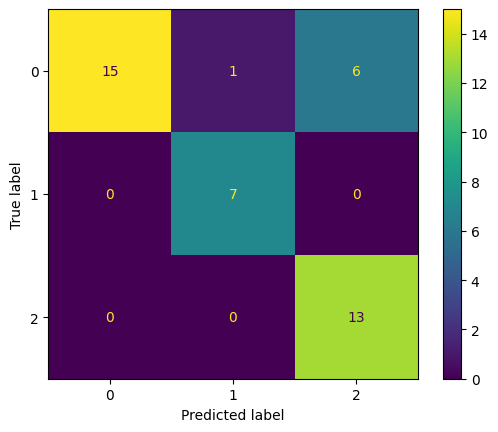

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#print(predictions_svm1)
cm = confusion_matrix(y_test, inferences_all_svm)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Plotting of correct and wrong prediction points of OvR SVM ###

In [ ]:
y_test_ravel = y_test.values.ravel()

arr_equ_svm = y_test_ravel == inferences_all_svm
print(arr_equ_svm)
true_indices_svm = np.where(arr_equ_svm == True)
print(true_indices_svm)
false_indices_svm = np.where(arr_equ_svm == False)
print(false_indices_svm)

[ True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
 False  True False  True  True  True]
(array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
       20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 37, 39, 40,
       41]),)
(array([ 6,  7, 17, 26, 34, 36, 38]),)


In [ ]:
correct_svm = X_train_numpy[true_indices_svm]
wrong_svm = X_train_numpy[false_indices_svm]

Text(0.5, 1.0, 'Plot of correct detection points of OvR SVM')

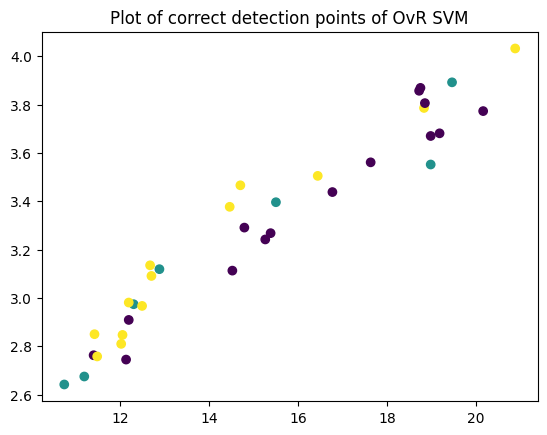

In [ ]:
plt.scatter(correct_svm[:,0], correct_svm[:,1], c= y_test_ravel[[true_indices_svm]])
plt.title('Plot of correct detection points of OvR SVM')

Text(0.5, 1.0, 'Plot of wrong detection points of OvR SVM')

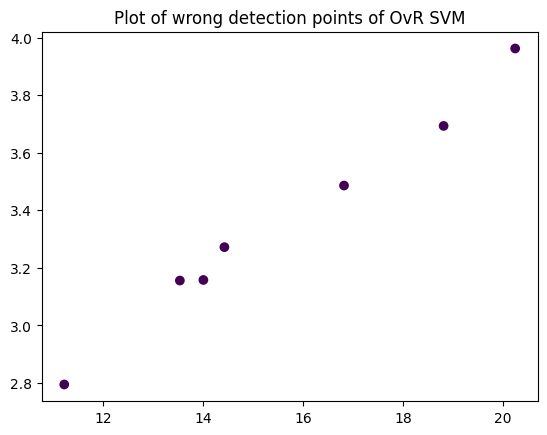

In [ ]:
plt.scatter(wrong_svm[:,0], wrong_svm[:,1], c= y_test_ravel[[false_indices_svm]])
plt.title('Plot of wrong detection points of OvR SVM')